# 使用K-means聚类算法对信用卡数据进行客户细分

## 一、摘要
本文介绍了k-means算法及其在数据集聚类中的应用。以CC GENERAL数据集为例，通过关系热力图、数学特征、缺失值等方面对数据集进行观察，发现存在缺失值和离群值等问题。为了处理这些问题，采用了缺失值填充、离群值处理、降维和缩放等方法对数据集进行预处理。

在选择K值时，本文介绍了肘部法和轮廓系数两种方法。通过这两种方法选取K值为5，然后运行k-means算法进行聚类分析。最终通过可视化结果对用户进行细分，分为以下五类：高价值用户、大额消费用户、分期付款用户、现金提现用户和低价值用户。

## 二、K-means聚类算法介绍

- K-means聚类概念：K均值聚类（k-means）是基于样本集合划分的聚类算法。K均值聚类将样本集合划分为k个子集，构成k个类，将n个样本分到k个类中，每个样本到其所属类的中心距离最小，每个样本仅属于一个类，这就是k均值聚类，同时根据一个样本仅属于一个类，也表示了k均值聚类是一种硬聚类算法。K-means的工作方式是定义球形聚类，这些聚类是可分离的，这样平均值就会向聚类中心收敛，正因为如此，K-means有时可能表现不佳。K-means聚类的结果是：

  - K组的中心点可用于标记新数据
  - 得到训练数据的标签（每个数据点都被分配到一个聚类）
  
<div  align="center">
<img src="./pic/k-means.png" alt="k-means" style="zoom:60%;"/>
</div>

- K-means聚类算法实现步骤：Κ-means聚类算法的输入是聚类数量Κ和数据集。算法从对Κ中心点的初始估计开始，这些中心点可以是随机生成的，也可以是从数据集中随机选择的。然后，该算法在两个步骤之间反复进行：

1. 数据分配步骤：每个中心点都定义了一个聚类。在这个步骤中，每个数据点根据欧氏距离的平方被分配到其最近的中心点。如果ci是集合C中的中心点的集合，那么每个数据点x都被分配到一个集群中,基于下方公式，其中dist(·)是标准的(L2)欧氏距离：

<div  align="center">
<img src="./pic/k-means-数据分配.png" alt="k-means-数据分配"/>
</div>

2. 中心点更新步骤：通过取所有分配到该中心点聚类的数据点的平均值，重新计算中心点。该算法在第一和第二步之间迭代，直到满足停止标准（没有数据点改变聚类，距离之和最小，或达到某些最大迭代次数）。这个算法可能会收敛在一个局部最优上。用随机的起始中心点来评估该算法的一次以上的运行可能会得到更好的结果。

<div  align="center">
<img src="./pic/k-means-步骤.png" alt="k-means-步骤" style="zoom:40%;"/>
</div>

- 选择参数K：为了得到最佳的聚类数量，K-Means聚类可以使用 Elbow Criterion , Silhouette Coefficient , cross-validation, information criteria, the information theoretic jump method, the G-means algorithm等多种方法进行评估，而在本文中将使用 Elbow Criterion (肘形判据)和Silhouette Coefficient (轮廓系数)。

## 三、数据集分析与预处理

### 3.1 数据集分析

​本次实验采用的数据集是Credit Card Dataset，该样本数据集总结了过去6个月内约9000名活跃的信用卡持有者的使用行为。该文件在客户层面上有18个行为变量。以下是信用卡数据集的数据字典：

- CUST_ID：信用卡持有人的身份识别（分类）。
- BALANCE：他们账户中剩余的可用于购买的余额。
- BALANCE_FREQUENCY：余额更新的频率，得分在0和1之间（1=经常更新，0=不经常更新）。
- PURCHASES ： 从账户中购买的金额
- oneoff_purchases ： 一次性购买的最大金额
- installments_purchases ： 分期付款购买的金额
- CASH_ADVANCE : 用户预付的现金
- PURCHASES_FREQUENCY : 购买的频率，分数在0和1之间（1=经常购买，0=不经常购买）。
- ONEOFFPURCHASESFREQUENCY : 一次性购买的频率如何（1 = 经常购买，0 = 不经常购买）
- PURCHASESINSTALLMENTSFREQUENCY：分期付款购买的频率（1=经常购买，0=不经常购买）。
- CASHADVANCEFREQUENCY：预付现金的频率如何
- CASHADVANCETRX : 使用 "预付现金 "进行交易的数量
- PURCHASES_TRX：购买交易的数量
- CREDIT_LIMIT : 用户的信用卡限额
- PAYMENTS ： 用户支付的金额
- minimum_payments ： 用户支付的最低金额
- PRCFULLPAYMENT : 用户支付全额款项的百分比
- TENURE : 用户的信用卡服务期限

​下面先安装和导入需要使用的库。其中导入了很多有用的包，如numpy、pandas、matplotlib、seaborn等，这些包可以帮助我们进行数据处理、可视化和机器学习等方面的操作。此外，该代码还导入了一些机器学习库，如StandardScaler、KMeans、PCA和cosine_similarity，这些库可以帮助我们进行聚类、降维和相似度计算等任务。代码中还加入了一些警告过滤器，用于过滤掉一些警告信息，以避免在数据分析过程中的不必要干扰：

In [1]:
import numpy as np # 线性代数
import pandas as pd # 数据处理：CSV文件的I/O操作
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import os
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.metrics import silhouette_score


输出数据集行数和列数，查看其维度和实例数；输出数据集的前10行数据，查看数据集基本情况：

In [2]:
data= pd.read_csv("./input/CC GENERAL.csv")
print(data.shape)
data.head(10)

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


分析结果可知：
- 该数据集记录了8950名活跃的信用卡持有者的使用行为,即数据集有8950个实例
- 数据集存在缺失值，如MINIMUM_PAYMENTS
- 大多数列都有大量的0值

---

使用describe()函数获取数据集中数值型数据列的基本统计信息，包括计数、均值、标准差、最小值、25%分位数、50%分位数、75%分位数和最大值等，这些计量可以帮助我们更好地理解数据的分布和特征，从而更好地进行数据分析和建模：

In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


分析结果可知：
- 比较平均值和中位数可以看出大多数列都是高度右偏的（平均值比中位数大），说明数据存在极大值
---

生成数据集中数值型变量之间的相关性热力图，以便更好地理解变量之间的关系：

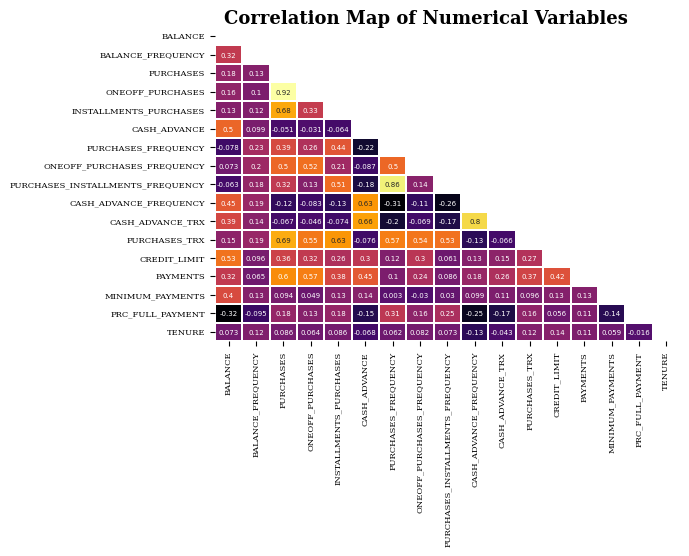

In [4]:
# --- Correlation Map (Heatmap) ---
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(data.corr(), mask=mask, annot=True, cmap='inferno', linewidths=0.1, cbar=False, annot_kws={"size":5})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=6, fontfamily='serif')
ax.set_yticklabels(ylabels, size=6, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show()

分析热力图可知：
- 一些变量与其他变量有中度到高度的相关值（>0.5到1）：高相关性变量的例子是PURCHASES和ONEOFF_PURCHASES，其相关值为0.92；另一个例子是CASH_ADVANCE_TRX与CASH_ADVANCE_FREQUENCY，相关值为0.8
### 3.2 数据集预处理
- 处理缺失值：
1. 用isnull()函数对缺失值进行判断，再用sum()方法，对每一列缺失值的数量进行求和，再用sort_values()方法按照缺失值的数量进行排序（缺失值数量从大到小）。最后，返回排好序的前几行数据，这样我们可以快速了解数据中缺失值最多的列和缺失值的数量，有助于我们进行数据清洗和处理：

In [5]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

2. 由上述结果可知，MINIMUM_PAYMENTS存在313个缺失值，CREDIT_LIMIT存在1个缺失值，将缺失值替换为该列的平均值可以有效地填充缺失值，避免在数据分析和建模过程中对缺失值的影响。具体而言，用布尔索引筛选出"MINIMUM_PAYMENTS"列、"CREDIT_LIMIT"列中缺失值的行，即"data['MINIMUM_PAYMENTS'].isnull()==True"、"data['CREDIT_LIMIT'].isnull()==True"然后将这些缺失值用"data['MINIMUM_PAYMENTS'].mean()"的平均值、"data['CREDIT_LIMIT'].mean()"的平均值进行填充，即将缺失值替换为该列的平均值：

In [6]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()
data.isnull().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

再次输出缺失值排序数列的前5个，可见缺失值全部都被处理了。

---

- 处理离群值：

由于数据集中有太多的离群值，通过丢弃离群值，我们会失去很多行。因此，我们要制定范围，通过分组来处理极端值。
1. 经观察，'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS'这八列数据数值较大，可以共用一种划分标准，具体而言：使用"loc"函数和条件表达式对该列中的数据进行分类处理，例如，"data.loc[((data[c]>0)&(data[c]<=500)),Range]=1"表示将该列中数值在0到500之间的数据赋值为1。最终，生成了8个新的列，其中每个新的列都表示原始数据的一个范围：

In [7]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6

2. 经观察，'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'这六列数据数值较小，可以共用一种划分标准，具体而言：使用"loc"函数和条件表达式对该列中的数据进行分类处理，例如，"data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1"表示将该列中数值在0到0.1之间的数据赋值为1，这样就将该列中的数据按照一定范围进行了分类。最终，生成了6个新的列，其中每个新的列都表示原始数据的一个范围：

In [8]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10

3. 最后，将数据集中的 'PURCHASES_TRX' 和 'CASH_ADVANCE_TRX' 两列数据进行分组处理。具体而言：使用"loc"函数和条件表达式对该列中的数据进行分类处理，例如，"data.loc[((data[c]>0)&(data[c]<=5)),Range]=1"表示将该列中数值在0到5之间的数据赋值为1，这样就将该列中的数据按照一定范围进行了分类。最终，生成了2个新的列，其中每个新的列都表示原始数据的一个范围：

In [9]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

---
- 降维

通过 drop() 函数删除数据集中的多列，包括一些卡客户ID和处理离群值之前的原本特征列，然后使用 asarray() 函数将处理后的数据集转换为 NumPy 数组，以便用于构建机器学习模型或其他数据分析任务：

In [10]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

---

- 缩放：


缩放是必不可少的，因为它可以管理数据集的可变性，使用线性转换将数据转换到一个确定的范围，以产生高质量的聚类，并提高聚类算法的精度。缩放是将数据进行标准化处理，将所有特征的数值缩放到均值为0，方差为1的标准正态分布上，以便后续建模过程中的优化。具体地，使用了sklearn库中的StandardScaler()方法。代码中将X矩阵进行标准化处理，并返回处理后的X矩阵的形状：

In [11]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

## 四、K-means聚类算法实现及结果

### 4.1 确定K值-肘部判据

- 肘部判据是一种基于 K 值对应的模型总方差（inertia）来寻找最佳 K 值的方法。在这个方法中，我们对一系列的 K 值计算模型总方差，并观察它们与 K 值的关系。通常来说，随着 K 值的增加，模型总方差也会随之减小，直到某个 K 值，之后继续增加 K 值不会显著降低总方差。这个 K 值就是我们的最佳 K 值，它所对应的点就是肘部。

    具体而言，通过绘制SSE（Sum of Squared Errors，误差平方和）与聚类数K之间的关系图，寻找图中的“肘部”或“拐点”，即SSE下降速度变缓的位置，来确定最佳的聚类数。通过循环尝试不同的聚类数K，对每一个K值都运行KMeans算法，计算得到对应的SSE，并将结果保存在 cost 数组中。之后我们可以通过绘制 cost 曲线来确定最佳的 K 值：

In [12]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  # inertia: 样本到最近聚类中心的距离总和

- 使用 plt.plot(cost, 'bx-') 将聚类代价函数值绘制成一个蓝色的线图，x 轴表示聚类数目，y 轴表示聚类代价函数值。'bx-' 表示绘制蓝色的带 x 的线图：

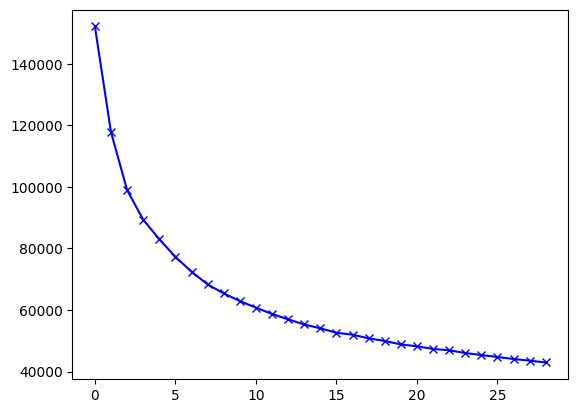

In [13]:
plt.plot(cost, 'bx-')

- 上图中k=4之后损失函数随着K的增大下降较为平缓，k=4,5,6时有着类似的功能，为了得到更精确的结果下面将采用轮廓系数的方法来加以确认。

### 4.2 确定K值-轮廓系数 
- 轮廓系数是指：对于一个样本集合，它的轮廓系数是所有样本轮廓系数的平均值。轮廓系数的取值范围是[-1,1]，同类别样本距离越相近，不同类别样本距离越远，分数越高。聚类的效果越好。

    在这种方法中，我们计算每个样本的轮廓系数，它代表了每个样本与其所属簇的相似度和不属于其他簇的不相似度。然后我们计算所有样本的平均轮廓系数，该值越高则代表聚类的效果越好。在此代码段中，我们使用 KMeans 聚类算法来拟合数据并计算轮廓系数。我们尝试将聚类数量从 2 到 7 进行遍历，并计算每个聚类数量下的轮廓系数。最后，我们将轮廓系数绘制成条形图，以便比较不同聚类数量的效果：

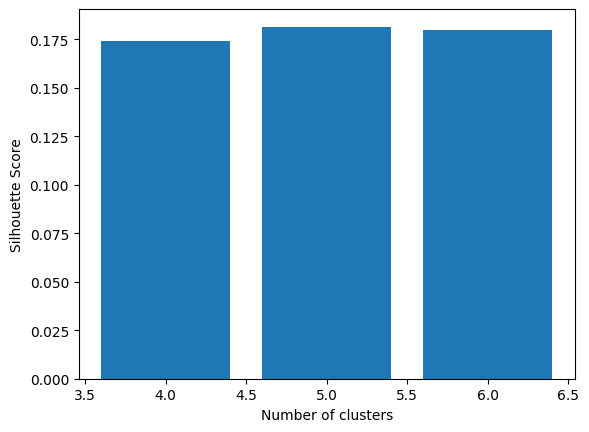

In [14]:
silhouette_scores = [] 

for n_cluster in range(4, 7):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
k = [4, 5, 6] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

- 由上图可知，k=5数值最大，效果最优。这两种方法从不同角度评估聚类效果：轮廓系数更注重聚类的紧密度和分离度，能够更好地度量聚类的效果。肘部法则更注重SSE，即聚类结果的误差平方和，它能够更好地度量聚类结果的准确性。综合考量两个算法，决定选择k=5。

### 4.3 K=5时的k-means

- 使用 KMeans 聚类算法将数据集 X 分成 5 类并将每个样本的簇标签添加到数据的末尾列中，使用 pandas 将原始数据集 data 和簇标签合并成一个包含聚类结果的新数据集 clusters：

In [15]:
kmean= KMeans(5)
kmean.fit(X)
labels=kmean.labels_

clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head(10)

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,2
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,4
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,1
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,2
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,2
5,12,3,3,0,3,0,3,3,3,10,7,0,6,0,0,2,0,0
6,12,2,5,5,2,0,6,5,1,10,10,10,10,0,10,7,0,1
7,12,3,1,0,1,0,3,2,2,10,10,0,10,0,0,3,0,0
8,12,3,2,2,1,0,5,2,1,10,4,1,3,0,0,1,0,2
9,12,1,3,3,0,0,6,3,1,6,2,2,0,0,0,1,0,3


### 4.4 K=5时的结果可视化(PCA)
- PCA（Principal Component Analysis）是一种常见的降维技术，用于将高维数据降到低维。PCA的主要思想是通过找到数据中的主成分来达到降维的目的，其中主成分是指能够最大程度解释数据变异性的线性组合。在这里使用PCA的目的是将高维的数据矩阵进行降维，以便能够将其可视化在二维平面上进行观察和分析，同时保留尽可能多的数据信息。这样可以更好地理解数据，发现数据中的模式和结构。具体步骤如下：
1. 对样本间的余弦距离进行计算，得到一个相似度矩阵
2. 对这个矩阵进行主成分分析（PCA）降维，将每个样本转化为一个二维坐标点
3. 进行可视化展示：从PCA对象中提取出降维后的两个特征值x和y，然后根据KMeans聚类算法得到的标签labels将样本点按照聚类的结果分成不同的组，然后用不同的颜色和形状绘制在二维坐标系上。用字典colors和names来记录每一类的颜色和名称，并且用groupby函数将数据按照标签分成不同的组，方便后续绘图。最后将各个组的数据点绘制到图像上，并添加图例和标题

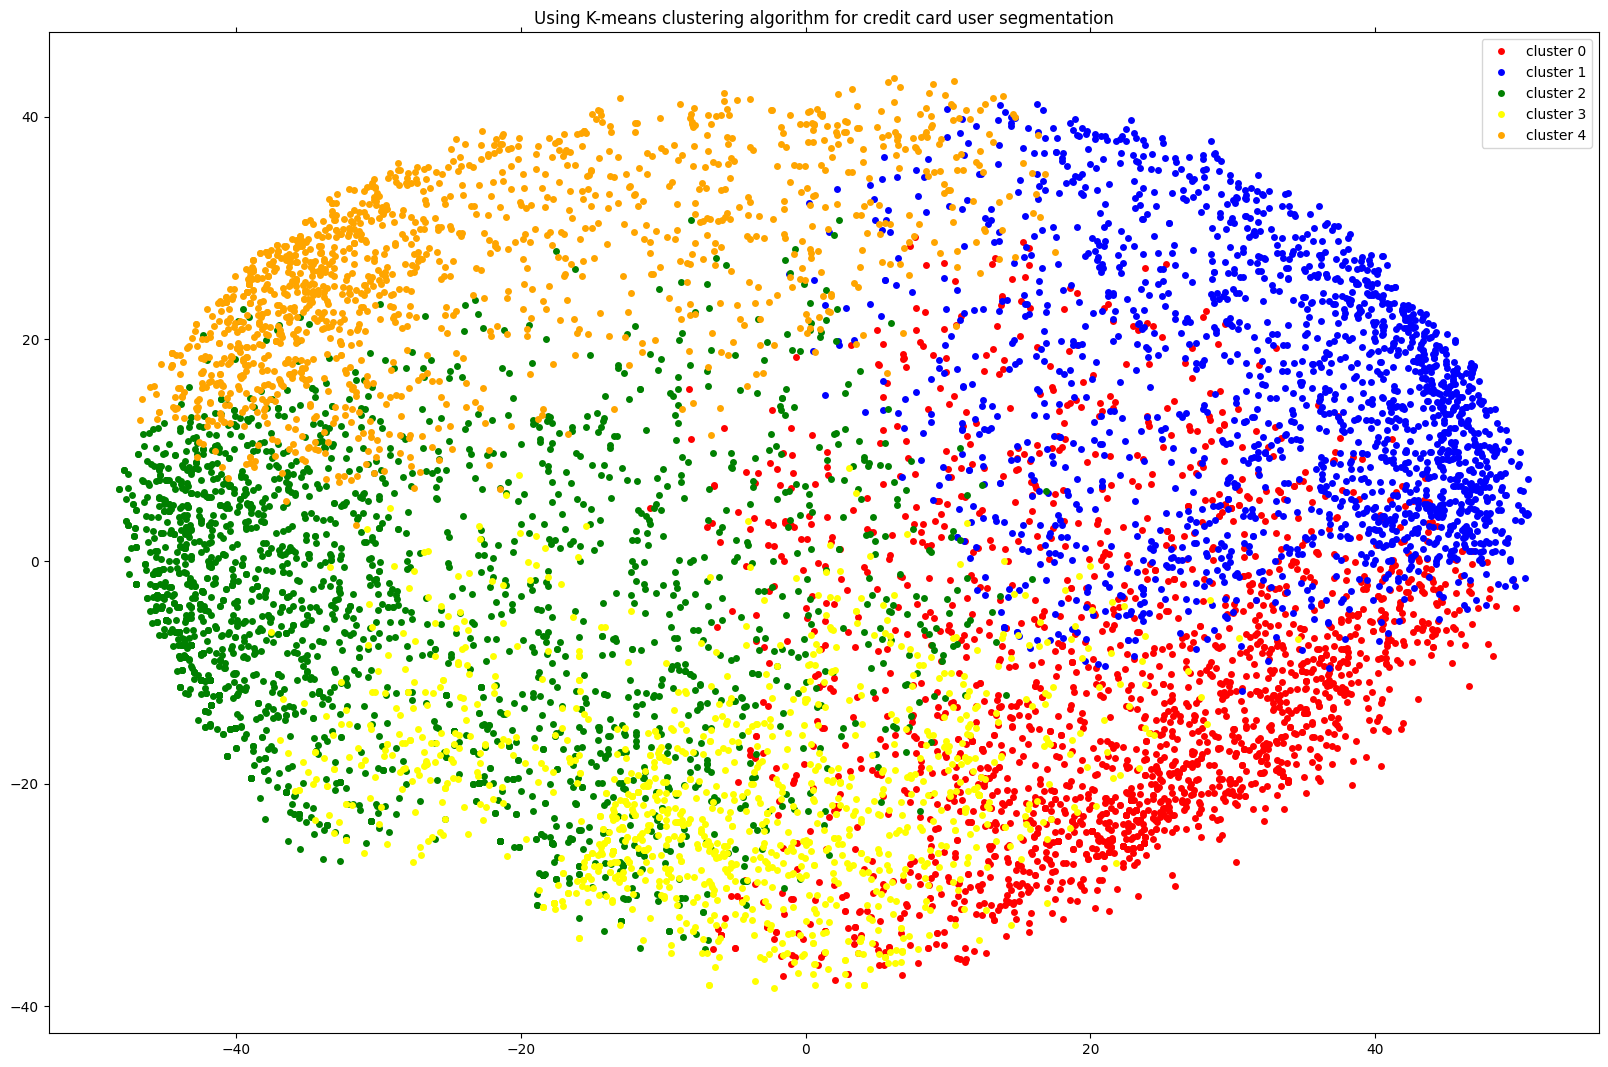

In [16]:

dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',}

names = {0: 'cluster 0', 
         1: 'cluster 1', 
         2: 'cluster 2', 
         3: 'cluster 3', 
         4: 'cluster 4', }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Using K-means clustering algorithm for credit card user segmentation")
plt.show()

### 4.5 k=5时根据结果进行客户细分

- 使用 seaborn 库中的 FacetGrid 函数和 matplotlib 库中的 hist 函数，用于将数据集按照聚类结果分成不同的列，每列对应一个聚类簇，然后在每列中绘制不同特征（c）的直方图。通过这种方式可以对聚类结果进行可视化，了解不同簇之间的数据分布情况，<mark>需要注意的是每次运行时簇的序号会改变</mark>：

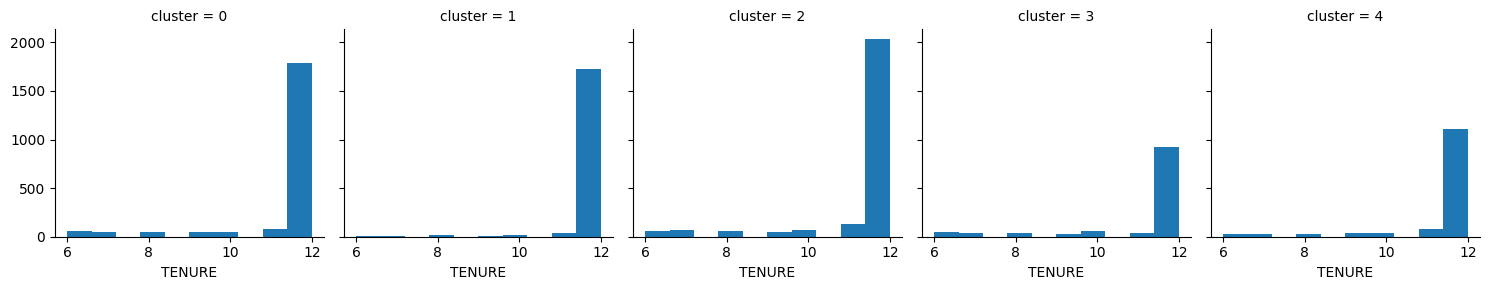

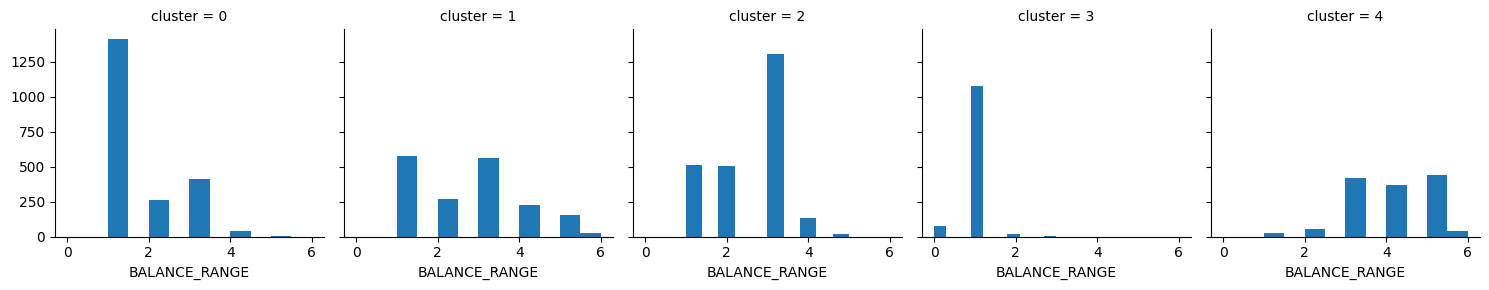

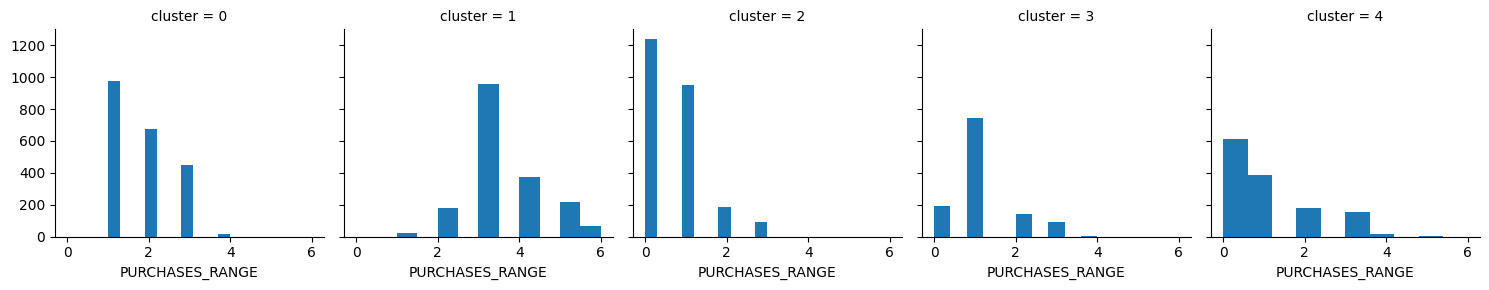

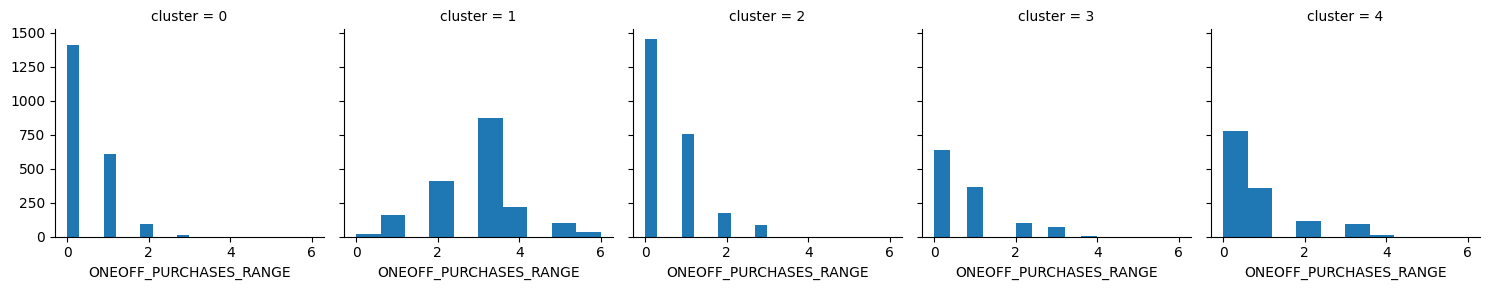

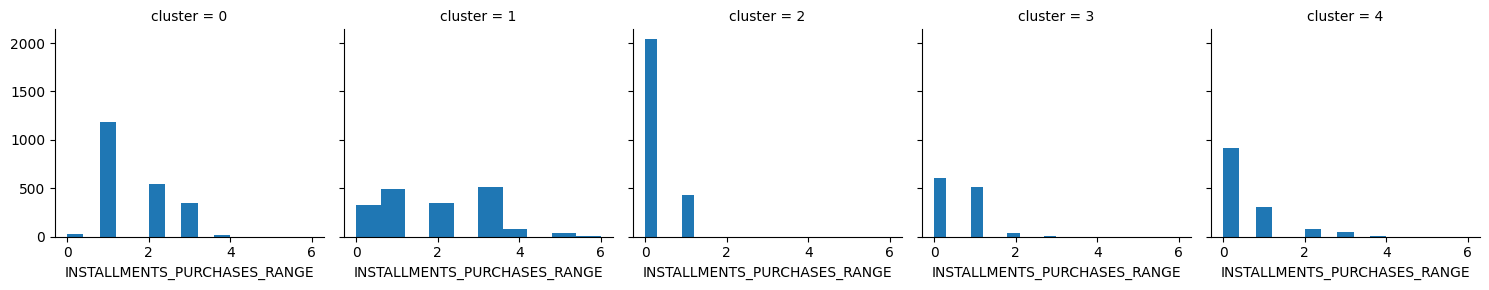

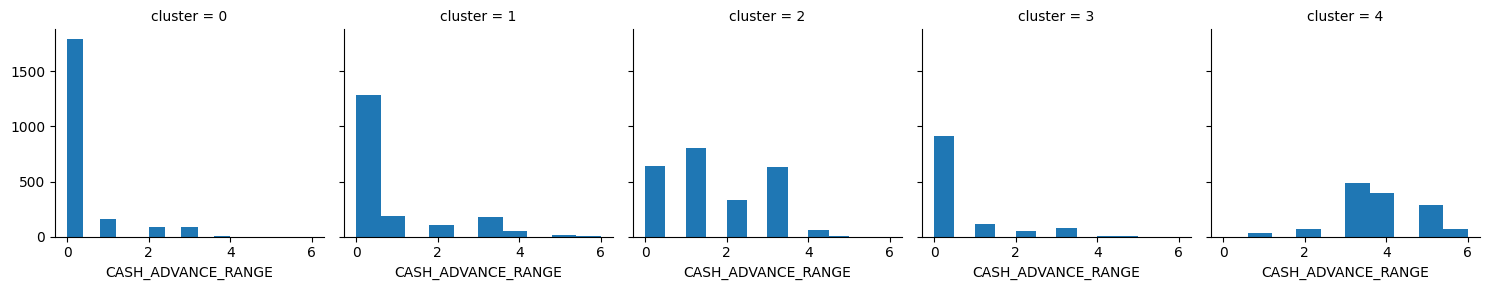

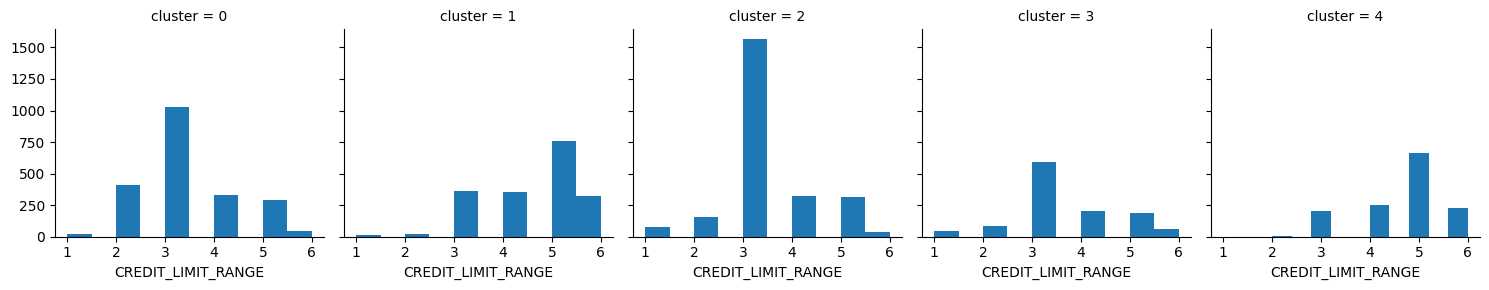

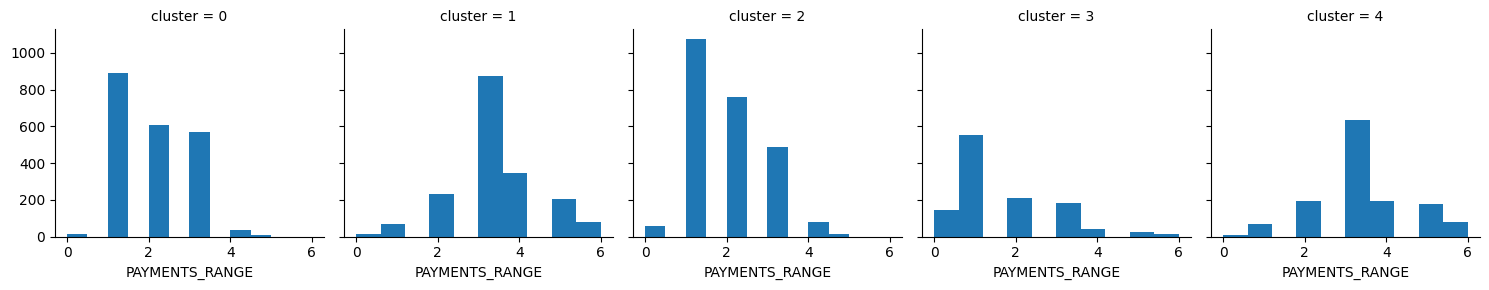

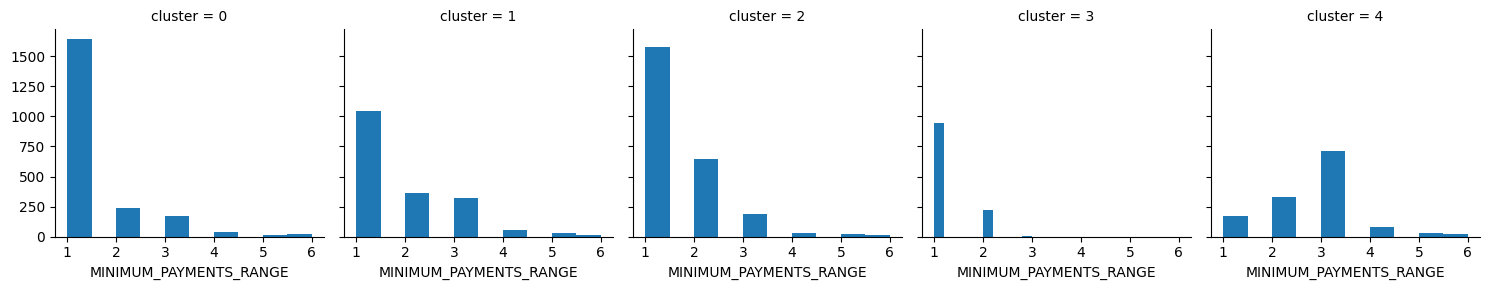

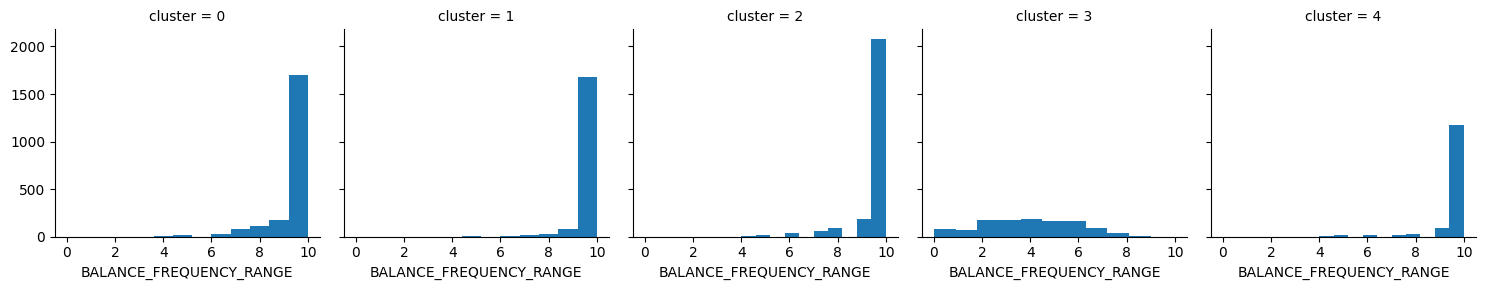

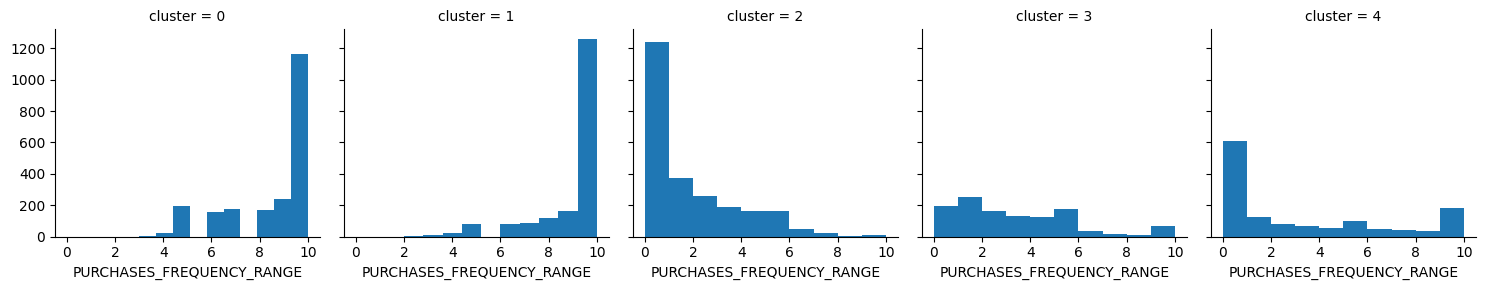

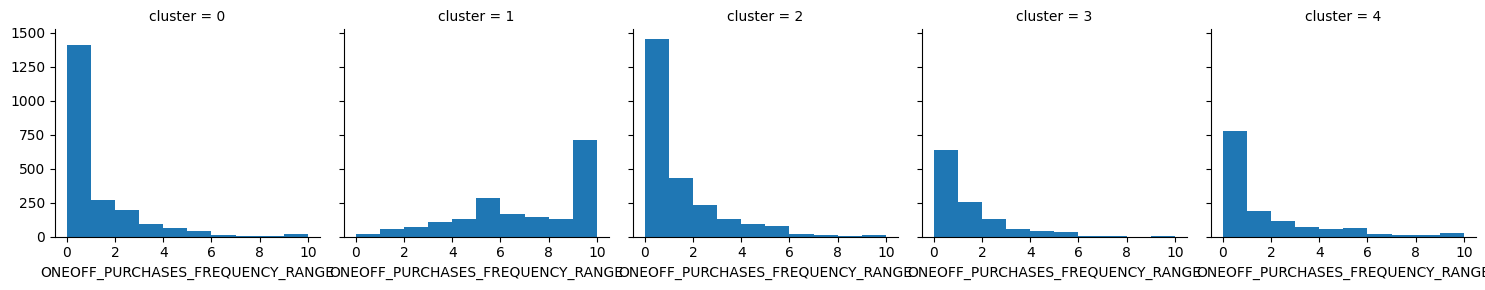

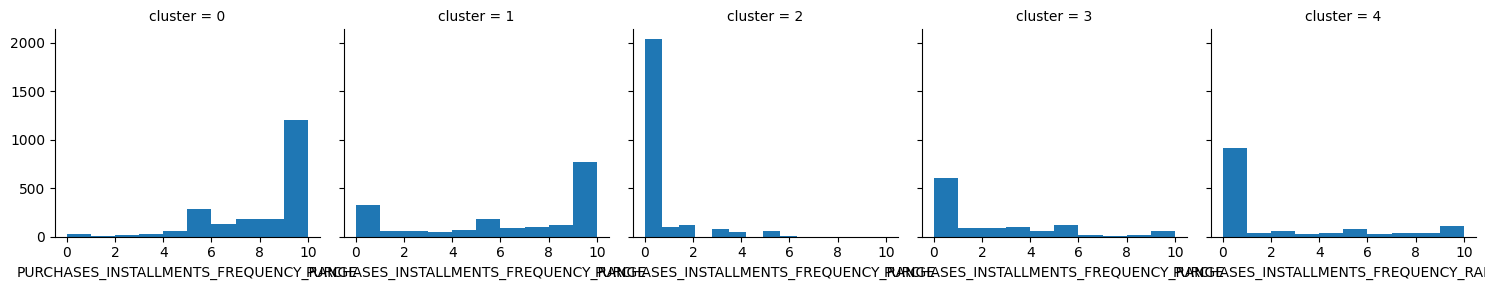

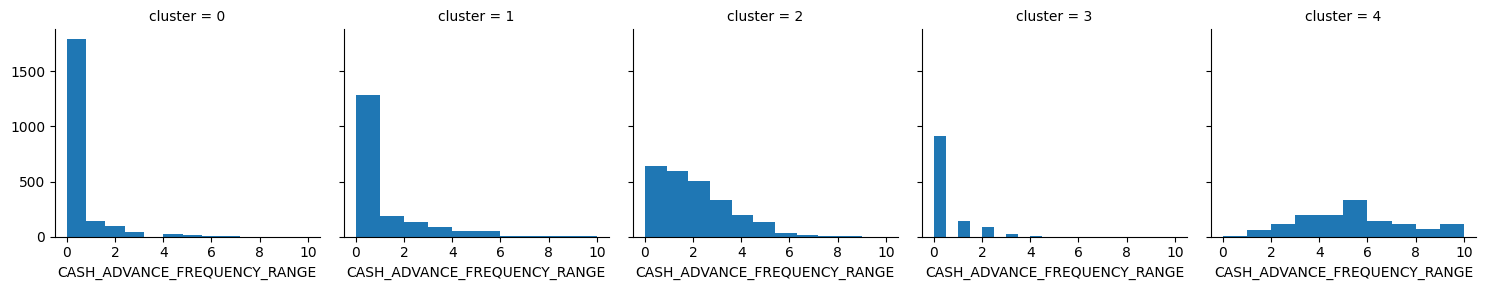

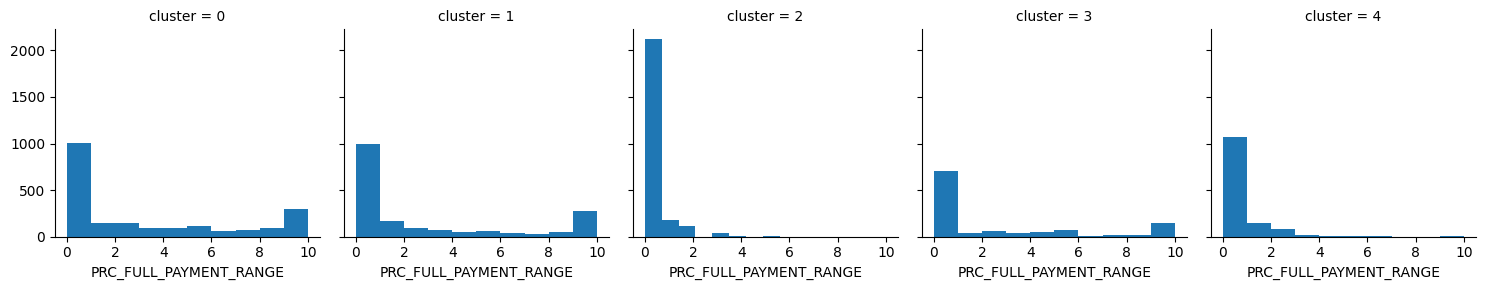

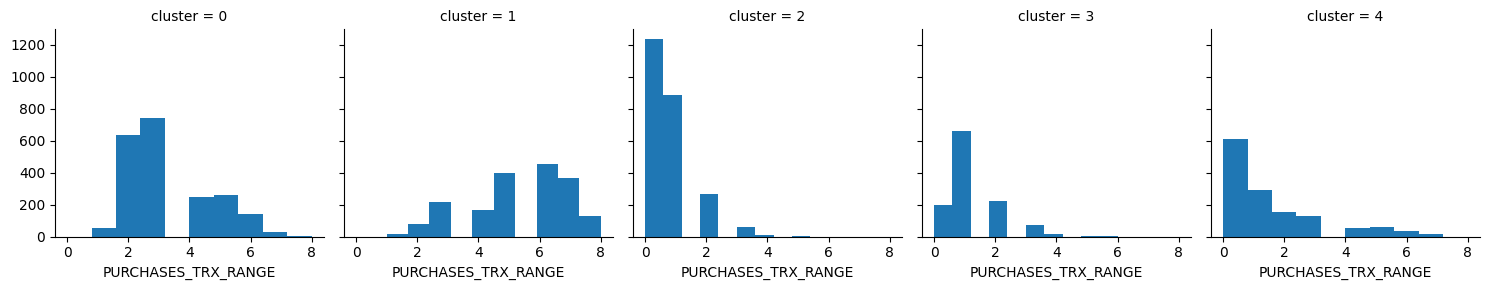

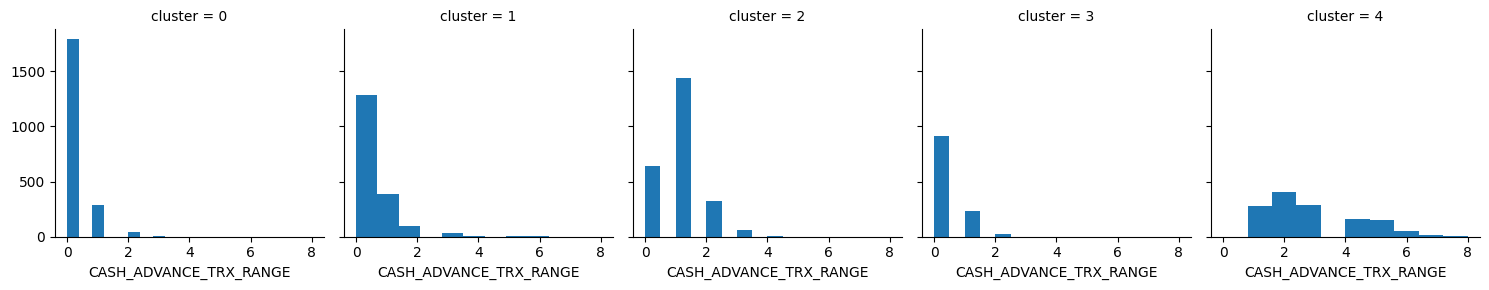

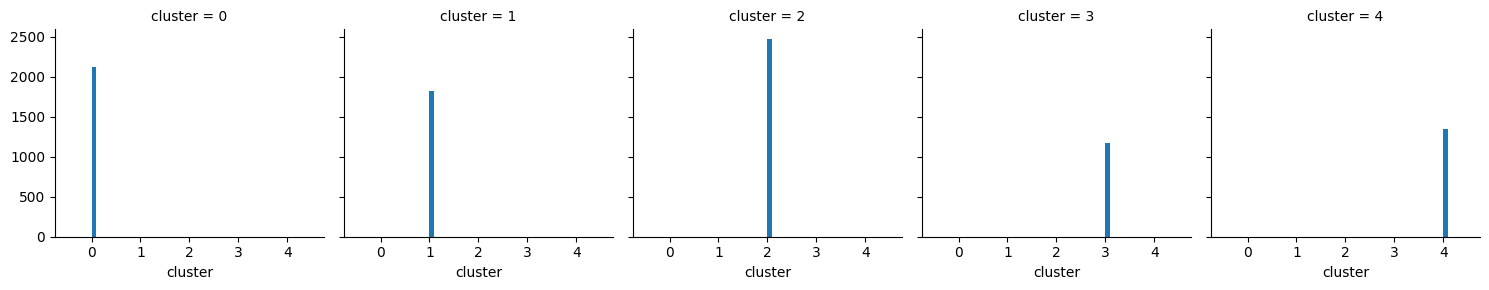

In [17]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

- 根据可视化结果以及数据集数据字典的含义，可将客户分为五类：低价值用户、现金提现用户、分期付款用户、大额消费用户和高价值用户，他们具有如下特点：
    - 第一类人在信用卡上的支出较少，基本没有使用预付现金服务，也很少透支。他们的信用卡限额较低，但是平均每次还款都相对较高，因此他们很可能是那些比较小心谨慎、不愿意承担过多债务的人。
    - 第二类人在信用卡上的消费比第一类人多一些，但是同样很少使用预付现金服务和透支，他们的信用卡限额也比第一类人高，每次还款的平均金额也相对较高。这一类人可能是更加注重信用卡使用的方便性和积累信用记录的人。
    - 第三类人的信用卡使用频率较高，平均每月的消费比前两类人都高，而且他们也经常使用预付现金服务。这一类人很可能是那些经常需要使用信用卡，同时也需要一定的透支和预付现金服务的人，例如旅游、消费等。
    - 第四类人的信用卡限额较高，每月的消费也相对较高，但是他们很少使用预付现金服务，也不会透支太多。这一类人可能是那些较为富裕、信用记录良好的人，他们的信用卡使用主要是为了方便和积累更多的积分、奖励。
    - 第五类人的信用卡限额最高，他们的消费也是最多的，他们经常使用预付现金服务，甚至会经常透支。这一类人很可能是那些比较富有、不太在意信用记录的人，他们更愿意通过信用卡获得更多的购买力。

## 五、总结与收获

综上所述，本文介绍了k-means算法在数据集聚类中的应用，并以CC GENERAL数据集为例，详细讲解了数据预处理、K值选择、聚类分析等步骤。最终得出了五种用户类型。在此过程中，我学到了以下知识和技能：
- 学习了k-means算法的基本原理和使用方法，以及如何使用轮廓系数和肘部法确定聚类数目。
- 了解了使用关系热力图、数学特征、缺失值等方面对数据集进行探索性分析的方法。
- 学习了如何使用缺失值、离群值、降维、缩放等方法进行数据预处理，以确保模型的准确性。
- 掌握了PCA降维的原理和使用方法，以及如何将高维数据降维到二维空间中进行可视化。
- 通过对聚类结果的可视化和特征分析，学习了如何根据结果特征进行用户细分，以及如何指导业务运营策略。